In [2]:
!pip install geopandas

  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
Using cached geopandas-1.0.1-py3-none-any.whl (323 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 68.6 MB/s eta 0:00:00m eta 0:00:0136m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 49.7 MB/s eta 0:00:00


In [3]:
import geopandas

geo_df = geopandas.read_file("https://gist.githubusercontent.com/walkerke/76cb8cc5f949432f9555/raw/363c297ce82a4dcb9bdf003d82aa4f64bc695cf1/mx.geojson")
geo_df.head()

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.2114 22.3545, -102.19084 ..."
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774..."
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028..."
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.5244 18.76659, -91.52457 1..."
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.9639 1..."


<Axes: >

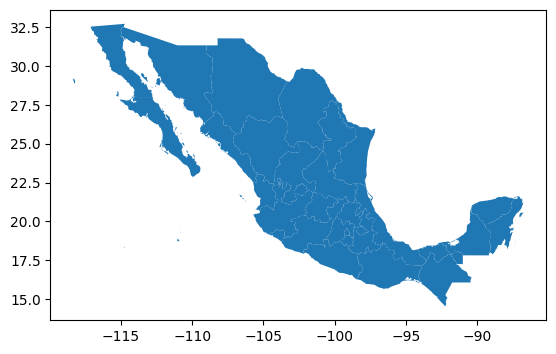

In [4]:
geo_df.plot()

In [35]:
import pandas as pd
import io
import requests

data = requests.get("https://simplemaps.com/static/data/country-cities/mx/mx.csv")
df = pd.read_csv(io.StringIO(data.content.decode('utf-8')))
df.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Mexico City,19.4333,-99.1333,Mexico,MX,Ciudad de México,primary,21804000.0,9209944.0
1,Guadalajara,20.6767,-103.3475,Mexico,MX,Jalisco,admin,5525000.0,1385621.0
2,Monterrey,25.6667,-100.3000,Mexico,MX,Nuevo León,admin,5341171.0,1135512.0
3,Tijuana,32.5250,-117.0333,Mexico,MX,Baja California,minor,2002000.0,1922523.0
4,Ecatepec,19.6097,-99.0600,Mexico,MX,México,minor,1929926.0,1929926.0


In [50]:
df[df['city'].apply(lambda a: 'tepa' in a.lower())]

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
74,Pinotepa,16.3412,-98.0537,Mexico,MX,Oaxaca,minor,53148.0,53148.0
130,Tepatlaxco,19.0667,-97.9667,Mexico,MX,Puebla,minor,17472.0,17472.0
200,Tepalcingo,18.5951,-98.8451,Mexico,MX,Morelos,minor,NaN,NaN


0      False
1      False
2      False
3      False
4      False
       ...  
211    False
212    False
213    False
214    False
215    False
Name: city, Length: 216, dtype: bool

In [44]:
"ASDEsdsa".lower()

'asdesdsa'

In [6]:
geo_df2 = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.lng, df.lat), crs='EPSG:4326')
geo_df2.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper,geometry
0,Mexico City,19.4333,-99.1333,Mexico,MX,Ciudad de México,primary,21804000.0,9209944.0,POINT (-99.1333 19.4333)
1,Guadalajara,20.6767,-103.3475,Mexico,MX,Jalisco,admin,5525000.0,1385621.0,POINT (-103.3475 20.6767)
2,Monterrey,25.6667,-100.3000,Mexico,MX,Nuevo León,admin,5341171.0,1135512.0,POINT (-100.3 25.6667)
3,Tijuana,32.5250,-117.0333,Mexico,MX,Baja California,minor,2002000.0,1922523.0,POINT (-117.0333 32.525)
4,Ecatepec,19.6097,-99.0600,Mexico,MX,México,minor,1929926.0,1929926.0,POINT (-99.06 19.6097)


In [17]:
intersect = geopandas.overlay(geo_df2, geo_df, how='union', keep_geom_type=False)

In [20]:
grouped = intersect.groupby(['id','state'])['population'].agg('sum')

<Axes: xlabel='id,state'>

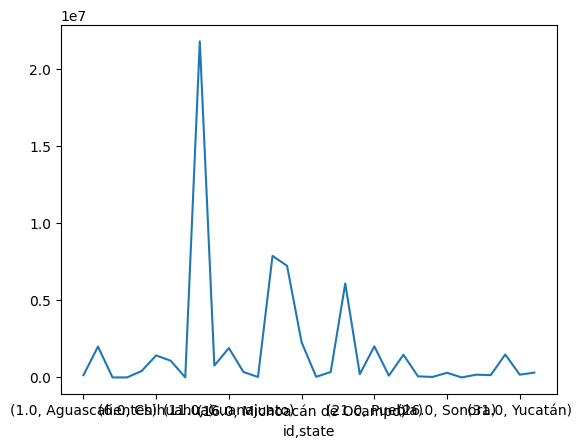

In [ ]:
grouped

In [8]:
grouped = intersect.groupby(['id','state'])['population'].agg('sum')

In [23]:
merge = pd.merge(geo_df, grouped, on="id")

In [24]:
merge.head()

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry,population
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.2114 22.3545, -102.19084 ...",142624.0
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774...",2002000.0
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028...",0.0
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.5244 18.76659, -91.52457 1...",0.0
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.9639 1...",415701.0


In [62]:
merge['plants'] = 0.0

In [56]:
merge

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry,population,plants
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.2114 22.3545, -102.19084 ...",142624.0,0
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774...",2002000.0,0
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028...",0.0,0
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.5244 18.76659, -91.52457 1...",0.0,0
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.9639 1...",415701.0,0
5,6,Chihuahua,Chihuahua,15.2,10.22,34.16,53.92,85.10,1.70,"MULTIPOLYGON (((-108.1375 31.77754, -108.11161...",1425840.0,0
6,7,Coahuila,Coahuila de Zaragoza,5.7,6.24,35.01,57.73,106.05,1.02,"MULTIPOLYGON (((-102.27618 29.86955, -102.2582...",1082342.0,0
7,8,Colima,Colima,21.0,13.36,18.30,67.89,76.49,0.45,"MULTIPOLYGON (((-114.73404 18.32925, -114.7405...",0.0,0
8,9,Distrito Federal,Distrito Federal,4.8,0.68,16.48,80.72,172.88,2.12,"MULTIPOLYGON (((-98.96395 19.08912, -98.97687 ...",21804000.0,0
9,10,Durango,Durango,17.4,16.62,25.77,56.25,67.61,1.36,"MULTIPOLYGON (((-105.7561 26.69129, -105.72954...",768634.0,0


In [71]:
merge.at[13, 'plants'] = 1#Jalisco
merge.at[7, 'plants'] = 0.4#Colima
merge.at[15, 'plants'] = 0.1#Michoacan
merge.at[23, 'plants'] = 0.1#San luis
merge.at[17, 'plants'] = 0.1#Nayarit
merge.at[31, 'plants'] = 0.4#Zacatecas
merge.at[0, 'plants'] = 0.2#Aguas

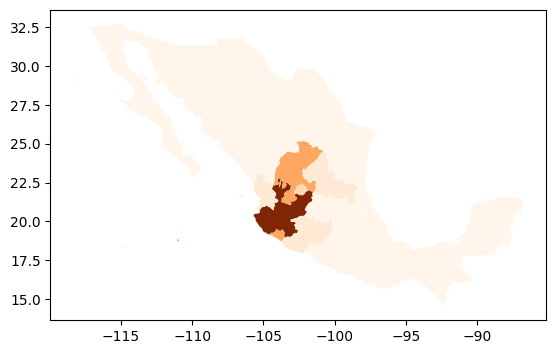

In [74]:
import matplotlib.pyplot as plt
merge.plot(column="plants", cmap='Oranges')
plt.savefig("map.svg")

In [26]:
merge

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry,population
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.2114 22.3545, -102.19084 ...",142624.0
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774...",2002000.0
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028...",0.0
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.5244 18.76659, -91.52457 1...",0.0
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.9639 1...",415701.0
5,6,Chihuahua,Chihuahua,15.2,10.22,34.16,53.92,85.10,1.70,"MULTIPOLYGON (((-108.1375 31.77754, -108.11161...",1425840.0
6,7,Coahuila,Coahuila de Zaragoza,5.7,6.24,35.01,57.73,106.05,1.02,"MULTIPOLYGON (((-102.27618 29.86955, -102.2582...",1082342.0
7,8,Colima,Colima,21.0,13.36,18.30,67.89,76.49,0.45,"MULTIPOLYGON (((-114.73404 18.32925, -114.7405...",0.0
8,9,Distrito Federal,Distrito Federal,4.8,0.68,16.48,80.72,172.88,2.12,"MULTIPOLYGON (((-98.96395 19.08912, -98.97687 ...",21804000.0
9,10,Durango,Durango,17.4,16.62,25.77,56.25,67.61,1.36,"MULTIPOLYGON (((-105.7561 26.69129, -105.72954...",768634.0


<Axes: >

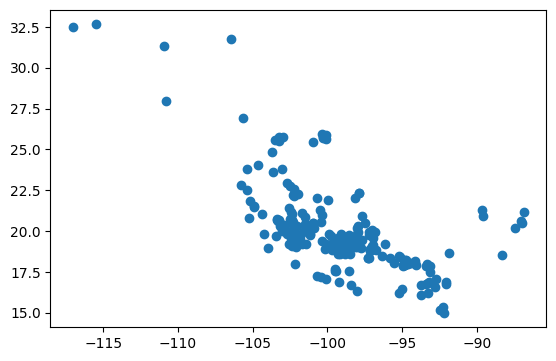

In [15]:
geo_df2.plot()